In [1]:
%matplotlib inline
import theano
floatX = theano.config.floatX
import pymc3 as pm
import theano.tensor as T
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('white')
np.random.seed(23)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
# Building dataset

data = np.loadtxt('motor.dat')

X_data = data[:, 0][:, None]
y_data = data[:, 1][:, None]

print (np.shape(X_data),np.shape(y_data))

(94, 1) (94, 1)


In [3]:
# Shuffling dataset
from sklearn.utils import shuffle

X_data_shuff,y_data_shuff = shuffle(X_data,y_data,random_state=23)
print (np.shape(X_data_shuff),np.shape(y_data_shuff))
# print(y_data_shuff)

(94, 1) (94, 1)


In [4]:
# Splitting dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_shuff, y_data_shuff, test_size=0.2, random_state=23)
print (np.shape(X_train), np.shape(y_train))
print (np.shape(X_test), np.shape(y_test))

(75, 1) (75, 1)
(19, 1) (19, 1)


No handles with labels found to put in legend.


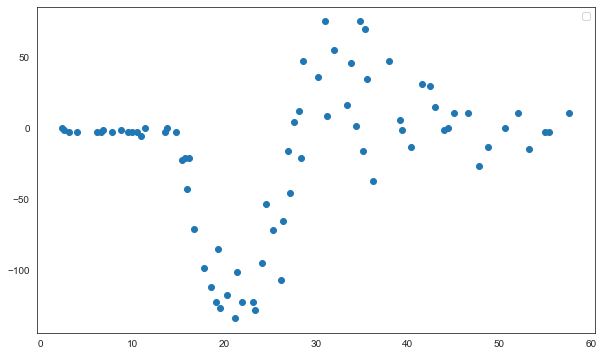

In [5]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.scatter(X_train,y_train)
ax.legend()
plt.show()
# print(y_train)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)


scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

print ('Scaling',np.shape(X_train), np.shape(y_train))
print ('Scaling',np.shape(X_test), np.shape(y_test))

Scaling (75, 1) (75, 1)
Scaling (19, 1) (19, 1)


No handles with labels found to put in legend.


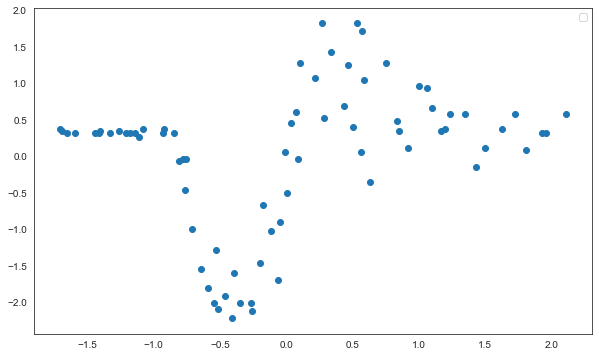

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.scatter(X_train,y_train)
ax.legend()
plt.show()
# print(y_train)
# 

No handles with labels found to put in legend.


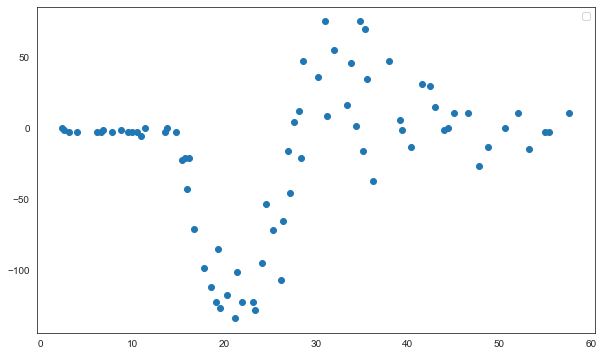

In [8]:
y_train = scaler_y.inverse_transform(y_train)
X_train = scaler_X.inverse_transform(X_train)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.scatter(X_train,y_train)
ax.legend()
plt.show()
# print(y_train)


In [9]:
X_data=np.vstack((X_train,X_test))
y_data=np.vstack((y_train,y_test))


print (np.shape(X_data),np.shape(y_data))

(94, 1) (94, 1)


In [ ]:
for i in range(1000):
    posterior_preds['out'][i] = scaler_y.inverse_transform(posterior_preds['out'][i])
    
y_data = scaler_y.inverse_transform(y_data)